<a href="https://colab.research.google.com/github/NikithaAnnJose/Data_Analatics/blob/main/signal%20filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

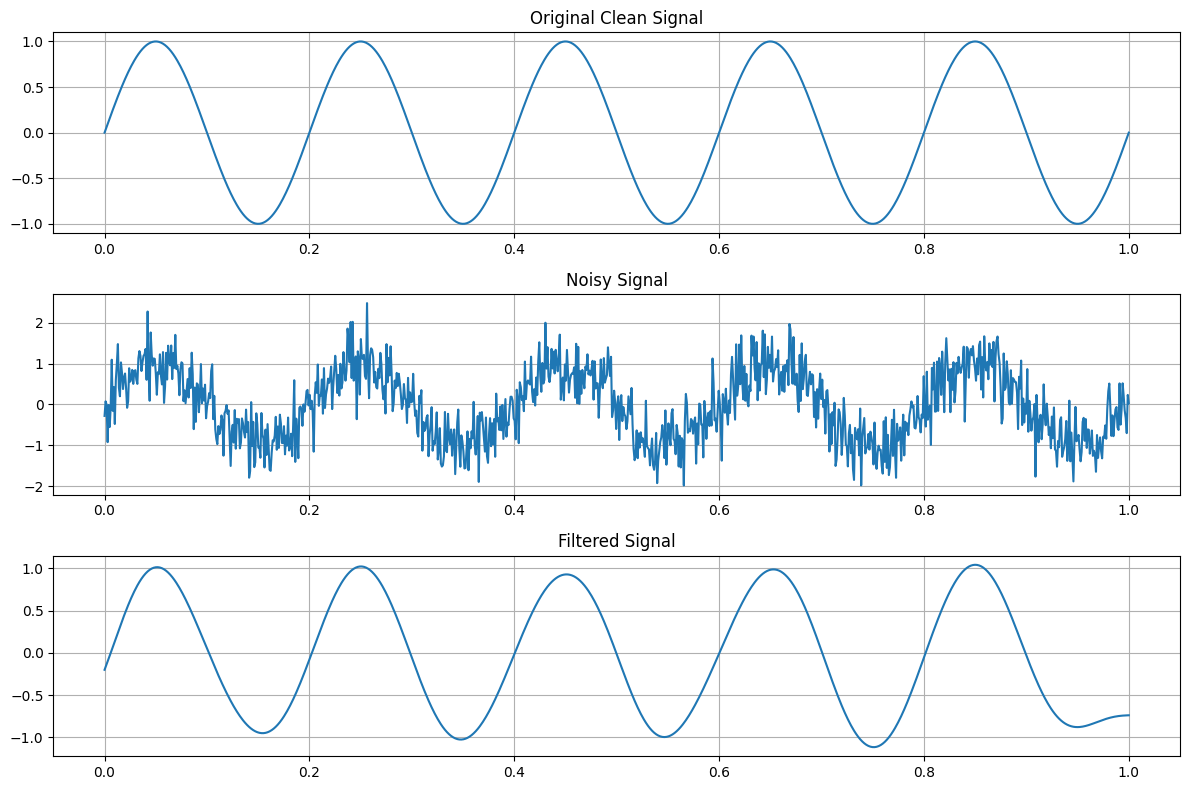

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

#creating a pure sine wave
fs = 1000          # Sampling frequency (Hz)
t = np.linspace(0, 1, fs)   #linspace is a numpyfunction

f_signal = 5       # Signal frequency (Hz)
clean_signal = np.sin(2 * np.pi * f_signal * t)

#adding noise
noise = np.random.normal(0, 0.5, fs)
noisy_signal = clean_signal + noise

#creating a LP butterworth filter
#filter parameters
cutoff = 10        # Cutoff frequency (Hz)
order = 4

#create filter
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)
from scipy.signal import butter, filtfilt

def lowpass_filter(data, cutoff, fs, order):
    """
    Applies a Butterworth low-pass filter to the input data.

    Parameters:
    data : array-like
        Input signal to filter
    cutoff : float
        Cutoff frequency in Hz
    fs : float
        Sampling frequency in Hz
    order : int
        Filter order (higher = steeper roll-off)

    Returns:
    filtered_data : array-like
        Filtered output signal
    """
    nyquist = 0.5 * fs                 # Nyquist frequency
    normal_cutoff = cutoff / nyquist   # Normalize cutoff
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data)  # Apply filter
    return filtered_data

#apply the filter
filtered_signal = lowpass_filter(noisy_signal, cutoff, fs, order)

#visualising results
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t, clean_signal)
plt.title("Original Clean Signal")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(t, noisy_signal)
plt.title("Noisy Signal")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(t, filtered_signal)
plt.title("Filtered Signal")
plt.grid()

plt.tight_layout()
plt.show()

